Convolutional neural networks are designed to work well with grid structured inputs, such as images

#### In numerica data features are know but how  do we select features of image ?
- This is where filters or kernels comes into picture. Early days hard coded filters were used for feature extraction ,such as vertical edge filter, horizontal and so on .
- LeNet Architecture put forward the technique in which the filters also considering to be a learnable parameters, ie,  the weights of filters will update using the optimizer used.


## Padding 

- Here extra pixels are added.
- Two types of padding , valid or no padding , same padding ( shape of input and feature maps are the same)
- During convolution the border sections of image are considered only once. This could be a problem if the border sections have important info of the image. Padding helps in selecting this more than once.
- convolution reduces image size, if size is not to be reduced with conv op, use padding

## Pooling`

- Adjacent pixels have same information of the image, or they have strong spatial dependencies in local regions of grid :)
- Using this layer directly may result in passing of redundant informtion and may result in overfitting.
- Pooling helps in reducing computational time and may avoid overfitting to some extent
- Pooling reduces the image shape (spatial footprint) , but the image depth remains the same.
- No Learning takes place in pooling operation.
- Pooling also helps in achieving translational invarience.


## Data Augmentation

- This is a technique to reduce overfitting.
- Here, new training examples are generated using transformations on original training data.
- This is because many transformations such as translation,rotation, patch extraction, and reflection do not fundamentally  change the properties of the object in an image.

## General Conventions in CNN which may help in increasing the model accurac

- Filter depth and the input depth should be same. (not a convention )
- The different case studys of cnn follows certain conventions which help in improoving model accuracy..
- Strides is selected as small value , typically 1 or 2 , however, large no. of strides can be used for reducing overfitting.
- No. of filters in each layer is a power of 2
- Size of fiters , ie, spatial dimensions  is selected to be a small value, many of the modern architecture have filter sizes as low as (3,3)
- Size of the feature map (convolved matrices) keeps on decreasing as we go deeper in CNN.
- No. of channels increases with depth, or more no of feature are extracted with depth , or hierachical feature extraction.
- Lernable parameters increases. (More features are extracted with depth of CNN). ie, heirarchical feature extraction takes place, or , feature of features is extracted in deeper layers of neural networks.
- Activation size decreases
- Generally MaxPooling is used for pooling.
- 'relu' activation function is used.

## Overview of Convolutional neural network

- Spatial footprint of activation maps means dimensions of the conv matrix.
- CNNs use heirarchical feature extraction,(features are extracted through different layers) in grid structured data. More layers means more features are extracted.
- Image data exibits translational invariance and cnn create similar features from local regions having similar patterns
- Each feature value or kernel is based on the local spatial region in the previous layer, hence spatial relationships are inherited between layers.
- Output of convolution is called Feature maps
- Activations in small regions of visual fields are used to activate particular neuron. Smaller portions of the real world image activates different portions of the kernel.
- Convolution operation is a dot product between the  spatial grid pattern in the input and the kernel/features
- A filter identifies a particular pattern from a small area in the rectangular image , and hence large  no. of filters are needed to capture all the dominant features of the image.
- Each filter extracts a particular feature from its visual field(input) and the next layer of filter extracts feature from this filter.
- eg: Layer 1 may extract different shapes from the image and Layer 2 may extract different shapes from the output shape , and this is how heirarchical feature extraction happens in CNN
- Advantages of using CNN are Parameter sharing and sparcity of connections
- Parameter sharing means that a particular feature detected could be used in different parts of the image.
- Sparcity of connnections means that output is connected only to very few no. of inputs
- Translational invarience means that one should be able to classify an object irrespective of its position.

## LeNet-5  Architecture

- One among the earliest architecture, (1998) , put forword the idea of learnable weights.
- 5 layers having weights . CP, CP,(FLATTEN),  FC3, FC4, SOFTMAX
- tanh activation function was used
- Primarily, for character recognisation , was used for identifying bank cheque serial number.



## AlexNet

- 2012 model
- Used relu activation function for the first time. All the convolutional layers were followed by relu fuction.
- Gpu used for the first time 
- used the concept of local resource normlisation. Since relu activation was used , negative values were stripped off and positive values were only considered, so the postive values were not standardized . so local response normalisation was used.
- Data Augmentation was introduced.
- Dropout was introduced ,to reduce overfitting.

##  VGG net - 16/19

- 2015 model
- In Alexnet and lenet filters were used with different shapes , whereas in VGG all conv layers had 3X3 filters.
- There was a gradual rise in no. of filters used in each layer. Hence more no. of features were extracted in subsequent stages, or , hierachical feature extraction is excellent.
- Images were converted into gray scale images.(Averaging of red, green and blue channel)
- More deeper layer and use of greater no. of filters means more no. of features were extracted.
- 'relu' activation function was used.
- Pooling layer was not used immediatedly after each convolution layer, A Block pattern was used.
- 3 X 3 has lesser no. of paramters.
- Reducing filter size and increasing the filter no.



## GoogLeNet

## ResNet 

# CNN in Practice

In [92]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

In [58]:
# Lets build and architecture similar to leNet-5 in MNIST  dataset
train_data, test_data = keras.datasets.cifar10.load_data()
x_train, y_train = train_data[0], train_data[1]
x_test, y_test = test_data[0], test_data[1]

In [65]:
labels = dict(zip(np.arange(10), ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']))
labels

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [59]:
x_train.shape, y_train.shape, x_test.shape , y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [66]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [69]:
def check_image(index_no):
    """
    Takes index of the image , less than 6000 and gives the image 
    """
    fig = px.imshow(x_train[index_no], width = 500, height = 500, title = f'Image of { labels[y_train[index_no][0] ]}', 
                    color_continuous_scale= ['black', 'white'])
    fig.show()


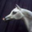

In [83]:
# Check the images in random indices
check_image(np.random.randint(0, 50000, (1,))[0])

## Layer Architecture

<table>
   <th>Layer No</th>
    <th>Input shape</th>
    <th>Shape of feature map</th>
    <th>No. of connections</th>
    
</table>



In [123]:
model = keras.Sequential()
#Input layer
model.add(layer = Input(shape = (32,32,3), batch_size = 64, name = 'Input_layer', ))
#Fisrst convolution layer
model.add(layer = Conv2D(filters = 6, kernel_size= (4,4), activation = 'relu', name = 'conv_1'))
#MaxPooling layer 1
model.add(layer = MaxPool2D(pool_size= (2,2), name = 'MaxPool_1'))
#Second Convolution layer
model.add(layer = Conv2D(filters = 8, kernel_size = (4,4), activation = tf.nn.relu, name  = 'conv_2'))
#Second Maxpool layer
model.add(layer = MaxPool2D(pool_size = (2,2), name = 'MaxPool_2'))
#Flattening
model.add(layer = Flatten())
#FC3
model.add(layer = Dense(units = 128, activation = 'relu', name = 'Fully_conn_layer_3'))
#FC4
model.add(layer = Dense(units = 64, activation = 'relu', name = 'Fully_conn_layer_4'))
#Output layer
model.add(layer = Dense(units = 10, activation = 'softmax', name = 'output_layer'))
model.summary()


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (64, 29, 29, 6)           294       
_________________________________________________________________
MaxPool_1 (MaxPooling2D)     (64, 14, 14, 6)           0         
_________________________________________________________________
conv_2 (Conv2D)              (64, 11, 11, 8)           776       
_________________________________________________________________
MaxPool_2 (MaxPooling2D)     (64, 5, 5, 8)             0         
_________________________________________________________________
flatten_4 (Flatten)          (64, 200)                 0         
_________________________________________________________________
Fully_conn_layer_3 (Dense)   (64, 128)                 25728     
_________________________________________________________________
Fully_conn_layer_4 (Dense)   (64, 64)                

In [128]:
# Random weights are initialised
for i in model.get_weights():
    print(i.shape)

(4, 4, 3, 6)
(6,)
(4, 4, 6, 8)
(8,)
(200, 128)
(128,)
(128, 64)
(64,)
(64, 10)
(10,)


Now lets understand various Weights and the shapes

- layer 1 - We use 6 filters of shape (4,4,3)
- Each of the filter in layer 1 has a bias which is the second weight , having shape of (6,) <br>
The output of Convolution layer 1 has 6 channels , hence the filter used in the next layer should have 6 channels(depths ) as well
- In layer 2 of convolutional layer we use 8 filters of shape(4,4,6)
- Each of the 8 layers are having a bias 
- the fully connected layer 3 is having 128 weights
